<a href="https://colab.research.google.com/github/adrianb896/ConvolutionNeuralNetworks/blob/main/AdrianBernardino_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Homework 3***

https://colab.research.google.com/drive/1uwPX8OGs6L3A6GxdjZEdUqsGn6M98i04?usp=sharing 

In [36]:
import numpy as np
import keras
from keras import backend
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import imdb
from keras_preprocessing.sequence import pad_sequences
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation, Embedding
from keras.layers import SpatialDropout1D, Conv1D, MaxPooling1D
from keras.layers import SpatialDropout1D, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import SpatialDropout3D, Conv3D, MaxPooling3D
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
keras.datasets.cifar100.load_data(label_mode="fine")

((array([[[[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [195, 205, 193],
           [212, 224, 204],
           [182, 194, 167]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [254, 254, 254],
           ...,
           [170, 176, 150],
           [161, 168, 130],
           [146, 154, 113]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [255, 255, 255],
           ...,
           [189, 199, 169],
           [166, 178, 130],
           [121, 133,  87]],
  
          ...,
  
          [[148, 185,  79],
           [142, 182,  57],
           [140, 179,  60],
           ...,
           [ 30,  17,   1],
           [ 65,  62,  15],
           [ 76,  77,  20]],
  
          [[122, 157,  66],
           [120, 155,  58],
           [126, 160,  71],
           ...,
           [ 22,  16,   3],
           [ 97, 112,  56],
           [141, 161,  87]],
  
          [[ 87, 122,  41],
           [ 8

# **Step 1: Set your hyperparameters**

In [38]:
output_dir = './keras_cifar100_model.h5'

# training
epochs = 25 # number of iterations to train your model
batch_size = 128 # number of samples propogated through the network
max_pooling_size = 2 # calculates the max value for kernel patches
n_classes = 100

# vector-space embedding
padding = 'same' # pads around input
optimizer = 'adam' # optimizer algorithmn
dropout = 0.5

In [39]:
(x_train, y_train), (x_valid, y_valid) = keras.datasets.cifar100.load_data(label_mode="fine")

# x_train, x_valid = x_train / 255.0, x_valid / 255.0
print('Train: x=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: x=%s, y=%s' % (x_valid.shape, y_valid.shape))

Train: x=(50000, 32, 32, 3), y=(50000, 1)
Test: x=(10000, 32, 32, 3), y=(10000, 1)


# **Step 2: Load and split your data**

In [25]:
(x_train, y_train), (x_valid, y_valid) = cifar100.load_data()

In [26]:
x_train[0:6]

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
        

In [40]:
x_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

In [41]:
for x in x_train[0:6]:
  print(len(x))

32
32
32
32
32
32


In [42]:
len(x_train), len(x_valid)

(50000, 10000)

In [43]:
len(y_train), len(y_valid)

(50000, 10000)

In [44]:
y_train[0:6]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86]])

In [45]:
y_train[0]

array([19])

In [46]:
for x in y_train[0:6]:
  print(len(x))

1
1
1
1
1
1


# **Step 3: Create your model**

3.a You will create a 5 stack CNN. The first stack will be your input layer, 2-3 will be convolution layers, 4 is your dense layer and 5 your output layer. Add pooling to each stack. The final activation function should be softmax. kernel size should be (3,3), and the number of neurons per layer is your choice.

In [47]:
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)
print(y_train.shape, y_valid.shape)

(50000, 100) (10000, 100)


In [48]:
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_train /= 255.0
x_valid /= 255.0
print(x_train.shape, x_valid.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [70]:
model = Sequential()
model.add(ZeroPadding2D(4, input_shape=x_train.shape[1:]))
# Stack 1:
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(dropout))
# Stack 2:
model.add(Conv2D(64, (1, 1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Conv2D(64, (2, 2), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Conv2D(128, (2, 2), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Conv2D(128, (2, 2), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(dropout))
# Stack 3:
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Conv2D(128, (2, 2), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Conv2D(128, (2, 2), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Conv2D(128, (2, 2), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(dropout))
# Stack 4:
model.add(Conv2D(256, (1, 1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Conv2D(256, (2, 2), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Conv2D(256, (2, 2), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(dropout))
# Stack 5:
model.add(Conv2D(768, (1, 1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(n_classes))
model.add(Activation('softmax'))

# **3.b Print a summary of your model**

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_2 (ZeroPaddi  (None, 40, 40, 3)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 40, 40, 64)        1792      
                                                                 
 activation_12 (Activation)  (None, 40, 40, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 20, 20, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 20, 20, 64)       

# **Step 4: Configure and train your model**
# **a. Compile your model**
# **b. Fit your model**

In [72]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [73]:
modelcheckpoint = ModelCheckpoint(output_dir, monitor='val_loss', verbose=1, save_best_only=True)

In [74]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=[modelcheckpoint],validation_data=(x_valid, y_valid))

Epoch 1/25
391/391 [==============================] - ETA: 0s - loss: 4.9066 - accuracy: 0.0090
Epoch 1: val_loss improved from inf to 4.62741, saving model to ./keras_cifar100_model.h5
391/391 [==============================] - 881s 2s/step - loss: 4.9066 - accuracy: 0.0090 - val_loss: 4.6274 - val_accuracy: 0.0100
Epoch 2/25
391/391 [==============================] - ETA: 0s - loss: 4.6123 - accuracy: 0.0086
Epoch 2: val_loss improved from 4.62741 to 4.60664, saving model to ./keras_cifar100_model.h5
391/391 [==============================] - 882s 2s/step - loss: 4.6123 - accuracy: 0.0086 - val_loss: 4.6066 - val_accuracy: 0.0100
Epoch 3/25
391/391 [==============================] - ETA: 0s - loss: 4.6063 - accuracy: 0.0090
Epoch 3: val_loss improved from 4.60664 to 4.60547, saving model to ./keras_cifar100_model.h5
391/391 [==============================] - 875s 2s/step - loss: 4.6063 - accuracy: 0.0090 - val_loss: 4.6055 - val_accuracy: 0.0100
Epoch 4/25
391/391 [==================

# **Step 5: Evaluate your model. In this step I want you to evaluate your model in two ways.**

# **5a. First, I want you to give an overall summary of the accuracy score of the model against your test set.**

In [75]:
model.load_weights(output_dir)

In [76]:
y_hat = model.predict(x_valid)

313/313 [==============================] - 43s 137ms/step


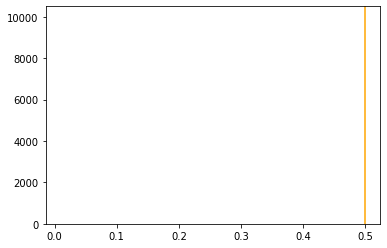

In [77]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [78]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'50.00'

# **5b. Second, I want you to take a random subsample of 12 images(this should be 12 random chosen every time the code block is run) from the test set. Use model.predict_classes to evaluating this subsample against your model. Then, display the predictions with the images and their prediction labels(taken from the provided file) using pyplot.**

In [80]:
labels = np.loadtxt("cifar100labels.txt", delimiter=',',dtype=str)

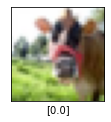

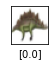

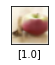

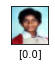

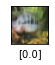

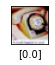

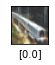

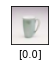

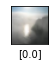

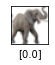

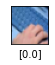

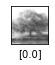

In [84]:
class_names = ['dock', 'turtle', 'leopard', 'road', 'porcupine', 'baby', 'caterpillar', 'seal', 'turtle', 'chair', 'lobster', 'pear']

plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel([y_train[i][0]])
  plt.show()

# **Step 6: Tune your model. Play with dropouts and other hyperparameters to come up with a better model(in terms of accuracy) than you got in step 5.**